## Задача проекта: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
## Цель: провести разведывательный анализ данных и выделить параметры для будущей модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv('stud_math.csv')

In [3]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## столбец 1: school

,school
GP,349
MS,46


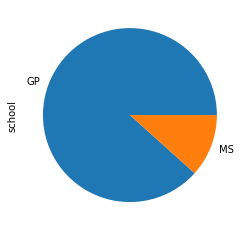

In [5]:
display(pd.DataFrame(data.school.value_counts()))
data.school.value_counts().plot(kind='pie');
#в датасете представлены всего две школы, их их распределение, очевидно, неравномерное

## Столбец 2: sex

In [6]:
display(pd.DataFrame(data.sex.value_counts()))

,sex
F,208
M,187


## Столбец 3: age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


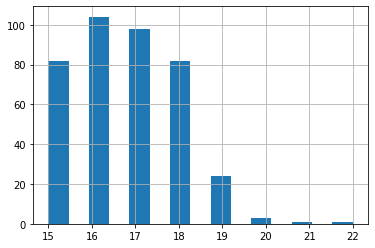

In [7]:
display(data.age.describe())
data.age.hist(bins=15)
display(pd.DataFrame(data.age.value_counts()))

In [8]:
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
perc25 = data.age.quantile(0.25)
perc75 = data.age.quantile(0.75)
print(f'25-ый процентиль: {perc25}, 75-ый процентиль: {perc75}, Медиана: {data.age.median()}, IQR: {IQR}, границы выбросов: {perc25 - 1.5*IQR} - {perc75+1.5*IQR}')
data[data.age>21] # находим один выброс

25-ый процентиль: 16.0, 75-ый процентиль: 18.0, Медиана: 17.0, IQR: 2.0, границы выбросов: 13.0 - 21.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,...,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


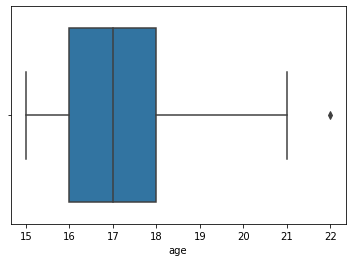

In [9]:
sns.boxplot(data.age);

## Есть один выброс: 22-летний студент.

In [10]:
## заменим этот выброс на ближайшее к нему значение: возраст 21.
data.age = data.age.apply(lambda x: 21 if x == 22 else x)
data.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
21      2
Name: age, dtype: int64

## Cтолбец 3. Address

In [11]:
display(pd.DataFrame(data.address.value_counts()))
data.address.describe()

,address
U,295
R,83


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [12]:
data.address.isnull().sum()

17

,address
U,308
R,87


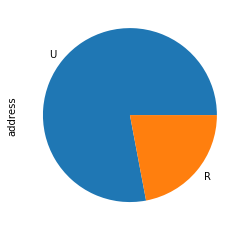

In [13]:
address = data.address
address.isnull().sum()
#address.fillna('Z', inplace=True)
address.value_counts()
#add=data.address
#add.value_counts()

#далее заполним 17 элементов с NaN значениями U и R в тех же пропорциях,
#в каких они представлены в датасете:

295+83 # посчитаем общее количество ненулевых значений и
295 / 378 # посмотрим, какая доля в общем количестве приходится на населенный пункт U
17 * 0.78 # выделим ту же долю в выборке из 17 NaN-ячеек и округлим до целого

address[0:353].fillna('U', inplace=True) #честно говоря, строку 353 я нашла методом подбора
address[353:395].fillna('R', inplace=True) # заполним пропуски значениями U и R  в пропорциональном отношении
display(pd.DataFrame(data.address.value_counts()))
data.address.value_counts().plot(kind='pie');

## Столбец 5. famsize

In [14]:
display(pd.DataFrame(data.famsize.value_counts()))
print(f'Ячеек с NaN значениями: {data.famsize.isnull().sum()}')

,famsize
GT3,261
LE3,107


Ячеек с NaN значениями: 27


In [15]:
# поступим так же, как и с предыдущим столбцом: заполним NaN-ячейки
# данными GT3 или LE3 в пропорциональном соотношении
print(int(261/(261 + 107) * 27)) # эти ячейки заполним данными GT3, остальные - LE3

19


,famsize
GT3,280
LE3,115


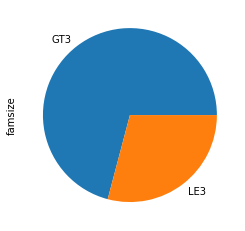

In [16]:
data.famsize[0: 253].fillna('GT3', inplace=True)
data.famsize[253:].fillna('LE3', inplace = True)
display(pd.DataFrame(data.famsize.value_counts()))
data.famsize.value_counts().plot(kind='pie');

## Столбец 6. Pstatus - родители живут вместе/раздельно

In [17]:
display(pd.DataFrame(data.Pstatus.value_counts()))
print(f'Ячеек с NaN значениями: {data.Pstatus.isnull().sum()}')

,Pstatus
T,314
A,36


Ячеек с NaN значениями: 45


In [18]:
print(int(314/(314+36)*45)) # столько ячеек передадим параметру T, остальные параметру А

40


,Pstatus
T,354
A,41


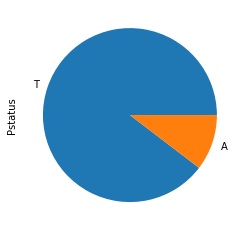

In [19]:
data.Pstatus[0:310].fillna('T', inplace=True)
data.Pstatus[310:].fillna('A', inplace=True)
display(pd.DataFrame(data.Pstatus.value_counts()))
data.Pstatus.value_counts().plot(kind='pie');

## Столбец 7. Medu - Образование матери

In [20]:
data.Medu.value_counts() 

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [21]:
data.Medu.describe() # у медианного количества матерей - есть среднее специальное или 11 классов школы

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

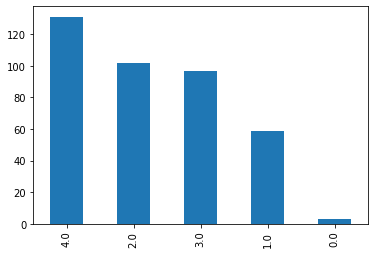

In [22]:
data.Medu.value_counts().plot(kind='bar');

In [23]:
perc25 = data.Medu.quantile(0.25)
perc75 = data.Medu.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, медиана: {data.Medu.median()}, межквартильное расстояние: {iqr}')

Границы выбросов: -1.0, 7.0, медиана: 3.0, межквартильное расстояние: 3.0


In [24]:
print(f'Количество NaN значений: {data.Medu.isnull().sum()}')

Количество NaN значений: 3


In [25]:
#заполним пропущенные значения медианными значениями
data.Medu.fillna(3.0, inplace=True)
data.Medu.value_counts()

4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64

## Столбец 8. Fedu - образование отца

In [26]:
display(pd.DataFrame(data.Fedu.value_counts()))
data.Fedu.describe()
print(f'Количество NaN значений: {data.Fedu.isnull().sum()}')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Количество NaN значений: 24


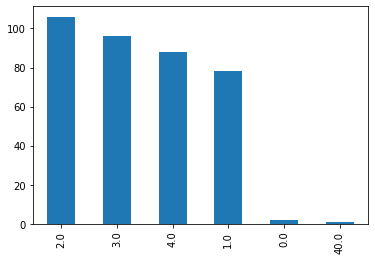

In [27]:
data.Fedu.value_counts().plot(kind='bar');

In [28]:
perc25 = data.Fedu.quantile(0.25)
perc75 = data.Fedu.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, медиана: {data.Fedu.median()}, межквартильное расстояние: {iqr}')

Границы выбросов: 0.5, 4.5, медиана: 2.0, межквартильное расстояние: 1.5


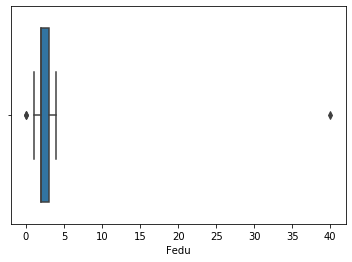

In [29]:
sns.boxplot(data.Fedu);

# есть выбросы: 2 значения = 0.0 и одно ошибочно введенное = 40.0. Заменим 40.00 на 4.0, а 0.0. - на ближайшие к ним значения - 1.00:


In [30]:
data.Fedu = data.Fedu.apply(lambda x: 4.0 if x == 40.0 else 1.0 if x == 0.0 else x)
data.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     80
Name: Fedu, dtype: int64

In [31]:
# поскольку распределение равномерное, заполним NaN ячейки медианным значением:

In [32]:
data.Fedu.fillna(2.0, inplace=True)

## Столбец 9: Mjob - работа матери

In [33]:
display(pd.DataFrame(data.Mjob.value_counts()))
print(f'Количество NaN значений: {data.Mjob.isnull().sum()}')
print('Заполним 19 NaN значений в пропорциональном соотношении:')
print(f'other: {round(133/376 * 19)}\nservices: {round(98/376 * 19)}\nat_home: {round(58/376 * 19)}\nteacher: {round(55/376*19)}\nhealth: {round(32/376 * 19)}')

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Количество NaN значений: 19
Заполним 19 NaN значений в пропорциональном соотношении:
other: 7
services: 5
at_home: 3
teacher: 3
health: 2


In [34]:
data[data.Mjob.isnull()]
data.Mjob[:146].fillna('other', inplace=True)
data.Mjob[146:220].fillna('services', inplace=True)
data.Mjob[224:266].fillna('at_home', inplace=True)
data.Mjob[266:292].fillna('teacher', inplace=True)
data.Mjob[293:].fillna('health', inplace=True)
data.Mjob.value_counts()

other       140
services    103
at_home      61
teacher      58
health       33
Name: Mjob, dtype: int64

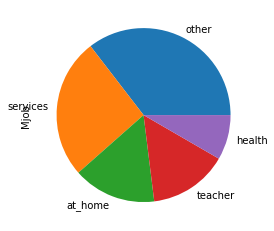

In [35]:
data.Mjob.value_counts().plot(kind='pie');

## Столбец 10: Fjob - работа отца

In [36]:
display(pd.DataFrame(data.Fjob.value_counts()))
print(f'Количество NaN значений: {data.Fjob.isnull().sum()}')
print('Заполним 36 NaN значений в пропорциональном соотношении:')
print(f'other: {round(197/359 * 36)}\nservices: {round(102/359 * 36)}\nat_home: {round(16/359 * 36)}\nteacher: {round(29/359*36)}\nhealth: {round(15/359 * 36)}')

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Количество NaN значений: 36
Заполним 36 NaN значений в пропорциональном соотношении:
other: 20
services: 10
at_home: 2
teacher: 3
health: 2


In [37]:
data[data.Fjob.isnull()]
data.Fjob[:183].fillna('other', inplace=True)
data.Fjob[183:342].fillna('services', inplace=True)
data.Fjob[342:364].fillna('at_home', inplace=True)
data.Fjob[365:375].fillna('teacher', inplace=True)
data.Fjob[375:].fillna('health', inplace=True)
data.Fjob.value_counts()

other       217
services    112
teacher      32
at_home      18
health       16
Name: Fjob, dtype: int64

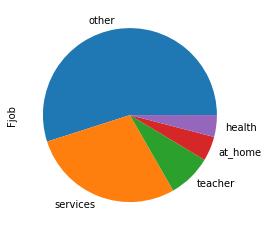

In [38]:
data.Fjob.value_counts().plot(kind='pie');

## Столбец 11: Reason - Причина выбора школы

In [39]:
display(pd.DataFrame(data.reason.value_counts()))
print(f'Количество NaN значений: {data.reason.isnull().sum()}')
print(f'Заполним {data.reason.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'course: {round(137/378 * 17)}\nhome: {round(104/378 * 17)}\nreputation: {round(103/378 * 17)}\nother: {round(34/378 * 17)}')

,reason
course,137
home,104
reputation,103
other,34


Количество NaN значений: 17
Заполним 17 NaN значений в пропорциональном соотношении:
course: 6
home: 5
reputation: 5
other: 2


In [40]:
data[data.reason.isnull()]
data.reason[:138].fillna('course', inplace=True)
data.reason[138:197].fillna('home', inplace=True)
data.reason[197:383].fillna('reputation', inplace=True)
data.reason[383:].fillna('other', inplace=True)
data.reason.value_counts()

course        143
home          109
reputation    108
other          35
Name: reason, dtype: int64

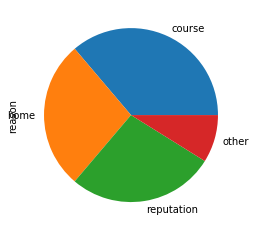

In [41]:
data.reason.value_counts().plot(kind='pie');

## Столбец 12: Guardian = опекун

In [42]:
display(pd.DataFrame(data.guardian.value_counts()))
print(f'Количество NaN значений: {data.guardian.isnull().sum()}')

,guardian
mother,250
father,86
other,28


Количество NaN значений: 31


## в данном случае большое количество пропусков, думаю, объясняется тем, что студенты из семей, где родители живут вместе, просто не поняли вопрос. Проверим мою гипотезу:

In [43]:
data.loc[(data.Pstatus=='T') & data.guardian.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,...,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,...,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,...,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,...,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,T,2.0,3.0,other,other,...,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,...,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,...,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


# Гипотеза верна: у 29 из 31 студентов, не отметивших статус guardian, родители живут вместе. Поэтому в данном случае я почти поровну поделю NaN-ячейки между матерью и отцом:

In [44]:
data[data.guardian.isnull()]
data.guardian[:241].fillna('mother', inplace=True)
data.guardian[241:].fillna('father', inplace=True)
display(pd.DataFrame(data.guardian.value_counts()))

,guardian
mother,266
father,101
other,28


## Столбец 13: Traveltime: время в пути до школы

In [45]:
display(pd.DataFrame(data.traveltime.value_counts()))
print(f'Количество NaN значений: {data.traveltime.isnull().sum()}')
display(pd.DataFrame(data.traveltime.describe()))
perc25 = data.traveltime.quantile(0.25)
perc75 = data.traveltime.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}')

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Количество NaN значений: 28


,traveltime
count,367.000000
mean,1.438692
std,0.694181
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


Границы выбросов: -0.5, 3.5


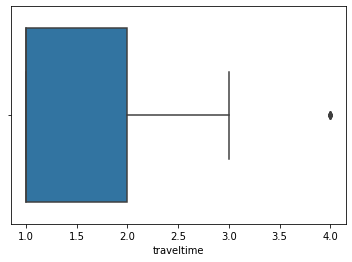

In [46]:
sns.boxplot(data.traveltime);

## в выборке есть выбросы: 7 человек, которые тратят на дорогу до школы более часа. Я заменю их ближайшим значением:

In [47]:
data.traveltime = data.traveltime.apply(lambda x: 3.0 if x == 4.0 else x)

In [48]:
print(f'Заполним {data.traveltime.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'1.0: {round(242/367 * 28)}\n2.0: {round(96/367 * 28)}\n3.0: {round(22/367 * 28)}\n4.0: {round(7/367 * 28)}')

Заполним 28 NaN значений в пропорциональном соотношении:
1.0: 18
2.0: 7
3.0: 2
4.0: 1


In [49]:
data[data.traveltime.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,...,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,...,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,...,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,...,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,...,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,...,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,T,2.0,2.0,at_home,other,...,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,...,-3.0,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


In [50]:
data.traveltime[0:235].fillna(1.0, inplace=True)
data.traveltime[235:385].fillna(2.0, inplace=True)
data.traveltime[385:].fillna(3.0, inplace=True)
display(pd.DataFrame(data.traveltime.value_counts()))

,traveltime
1.0,261
2.0,103
3.0,31


## Столбец 14: Studytime = время на учебу вне школы

In [51]:
display(pd.DataFrame(data.studytime.value_counts()))
print(f'Количество NaN значений: {data.studytime.isnull().sum()}')
display(pd.DataFrame(data.studytime.describe()))
perc25 = data.studytime.quantile(0.25)
perc75 = data.studytime.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.studytime.median()}')
print('В среднем ученики тратят на учебу вне школы 2-5 часов в неделю')

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Количество NaN значений: 7


,studytime
count,388.000000
mean,2.038660
std,0.842078
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


Границы выбросов: -0.5, 3.5, Медиана: 2.0
В среднем ученики тратят на учебу вне школы 2-5 часов в неделю


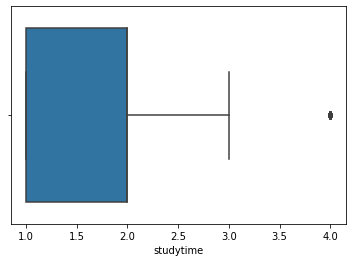

In [52]:
sns.boxplot(data.studytime);

## В выборке есть выбросы: 27 человек, которые тратят на учебу более 10 часов в неделю. 

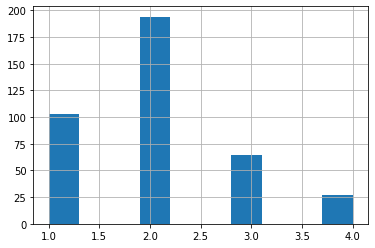

In [53]:
data.studytime.hist();

## Посмотрим на эти выбросы поближе:

In [54]:
data[data.studytime==4.0].T.head()

,47,66,67,69,70,71,76,77,94,95,...,256,259,271,282,293,298,303,330,334,338
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,M,M,F,F,M,M,M,F,M,F,...,F,F,F,F,F,F,F,M,F,F
age,16,15,16,15,16,15,15,16,15,15,...,17,17,18,18,17,18,17,18,18,18
address,U,U,U,R,U,U,U,U,U,R,...,U,U,U,R,R,U,U,U,R,U
famsize,GT3,GT3,GT3,LE3,GT3,GT3,GT3,GT3,LE3,GT3,...,LE3,LE3,GT3,LE3,LE3,GT3,GT3,LE3,GT3,LE3


In [55]:
data.loc[(data.studytime==4.0) & (data.school=='GP')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,other,...,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,...,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
67,GP,F,16,U,GT3,T,3.0,2.0,services,other,...,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,...,-12.0,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,...,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,...,-12.0,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
76,GP,M,15,U,GT3,T,4.0,1.0,teacher,other,...,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,...,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,...,-12.0,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,...,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0


## В глаза бросается то, что все "выбросы" - ученики, которые тратят на учебу более 10 часов в неделю, - учатся в одной и той же школе: GP. Создадим подвыборку для школы GP и проверим, не изменятся ли границы выбросов.

In [56]:
gp = data[data.school=='GP'] # создадим подвыборку для школы GP
display(pd.DataFrame(gp.studytime.value_counts()))
display(gp.studytime.describe())
perc25 = gp.studytime.quantile(0.25)
perc75 = gp.studytime.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {gp.studytime.median()}')
print('В среднем ученики тратят на учебу вне школы 2-5 часов в неделю')

,studytime
2.0,172
1.0,87
3.0,56
4.0,27


count    342.000000
mean       2.067251
std        0.855298
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Границы выбросов: -0.5, 3.5, Медиана: 2.0
В среднем ученики тратят на учебу вне школы 2-5 часов в неделю


## Выбросы так и остались выбросами:) Я их заменю на ближайшие значения:

In [57]:
data.studytime = data.studytime.apply(lambda x: 3.0 if x == 4.0 else x)

## Осталось заполнить NaN значения. Их всего семь, и учитывая нормальное распределение, я их заполню медианным значением:

In [58]:
data.studytime.fillna(2.0, inplace=True)

## Столбец 15 - failures: количество внеучебных неудач

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Количество NaN значений: 22


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Границы выбросов: 0.0, 0.0, Медиана: 0.0


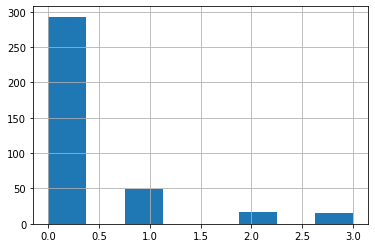

In [59]:
display(pd.DataFrame(data.failures.value_counts()))
print(f'Количество NaN значений: {data.failures.isnull().sum()}')
display(data.failures.describe())
perc25 = data.failures.quantile(0.25)
perc75 = data.failures.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.failures.median()}')
data.failures.hist(bins=8);

## Все значения выше 0.0. попали в выбросы. Значит, подавляющее большинство учеников либо не поняли вопрос, либо не считают, что сталкиваются с неудачами в жизни. Поскольку нет распределения, этот показатель нерелевантен и бесполезен для анализа.

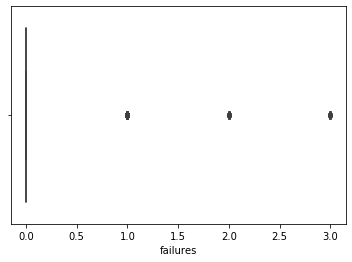

In [60]:
sns.boxplot(data.failures);

In [61]:
data.drop(['failures'], inplace=True, axis=1) # удаляю этот столбец

## Столбец 16. Schoolsup - дополнительная образовательная поддержка

,schoolsup
no,335
yes,51


Количество NaN значений: 9


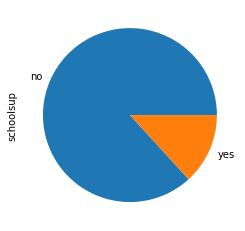

In [62]:
display(pd.DataFrame(data.schoolsup.value_counts()))
print(f'Количество NaN значений: {data.schoolsup.isnull().sum()}')
data.schoolsup.value_counts().plot(kind='pie');

In [63]:
#Заполним NaN-значения:
data.schoolsup.fillna('no', inplace=True)

# Не совсем понятно, что значит этот показатель: возможно, это количество студентов, которые получают дополнительную школьную поддержку, поскольку не успевают, либо же потому, что берут дополнительные продвинутые предметы. Возможно, корреляционный анализ прольет свет на этот показатель

## Столбец 18: famsup - семейная образовательная поддержка

,famsup
yes,219
no,137


Количество NaN значений: 39


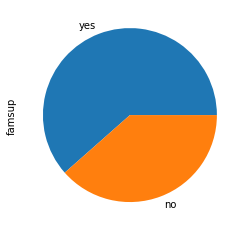

In [64]:
display(pd.DataFrame(data.famsup.value_counts()))
print(f'Количество NaN значений: {data.famsup.isnull().sum()}')
data.famsup.value_counts().plot(kind='pie');

In [65]:
print(f'Заполним {data.famsup.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'yes: {round(219/(395-39) * 39)}\nno: {round(139/(395-39) * 39)}')

Заполним 39 NaN значений в пропорциональном соотношении:
yes: 24
no: 15


In [66]:
data[data.famsup.isnull()]
data.famsup[0:247].fillna('yes', inplace=True)
data.famsup[247:].fillna('no', inplace=True)

## Столбец 19: paid - дополнительные платные занятия по математике

,paid
no,200
yes,155


Количество NaN значений: 40


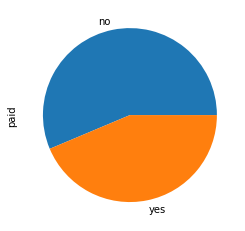

In [67]:
display(pd.DataFrame(data.paid.value_counts()))
print(f'Количество NaN значений: {data.paid.isnull().sum()}')
data.paid.value_counts().plot(kind='pie');

In [68]:
print(f'Заполним {data.paid.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'no: {round(200/(395-40) * 40)}\nyes: {round(155/(395-40) * 40)}')

Заполним 40 NaN значений в пропорциональном соотношении:
no: 23
yes: 17


In [69]:
data.paid[0:215].fillna('no', inplace=True)
data.paid[215:].fillna('yes', inplace=True)
display(pd.DataFrame(data.paid.value_counts()))

,paid
no,223
yes,172


## Столбец activities - дополнительные внеучебные занятия

,activities
yes,195
no,186


Количество NaN значений: 14


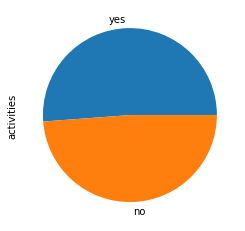

In [70]:
display(pd.DataFrame(data.activities.value_counts()))
print(f'Количество NaN значений: {data.activities.isnull().sum()}')
data.activities.value_counts().plot(kind='pie');

In [71]:
print(f'Заполним {data.activities.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'yes: {round(195/(395-14) * 14)}\nno: {round(186/(395-14) * 14)}')

Заполним 14 NaN значений в пропорциональном соотношении:
yes: 7
no: 7


In [72]:
data[data.activities.isnull()].iloc[6]

school                     GP
sex                         F
age                        15
address                     U
famsize                   LE3
Pstatus                     A
Medu                        3
Fedu                        4
Mjob                    other
Fjob                    other
reason                   home
guardian               mother
traveltime                  1
studytime                   2
schoolsup                 yes
famsup                     no
paid                       no
activities                NaN
nursery                   yes
studytime, granular        -6
higher                    yes
internet                  yes
romantic                  yes
famrel                      5
freetime                    3
goout                       2
health                      1
absences                    0
score                      55
Name: 126, dtype: object

In [73]:
data.activities[:127].fillna('yes', inplace=True)
data.activities[127:].fillna('no', inplace=True)

## Столбец 20: studytime-granular - время на учебу в деталях

In [74]:
display(pd.DataFrame(data['studytime, granular'].value_counts()))
print('Количество NaN значений:')
display(data['studytime, granular'].isnull().sum())

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Количество NaN значений:


7

## Это мистический параметр с отрицательными значениями, однако данные в строках повторяют данные в параметре studytime. Посмотрим на корреляцию:

In [75]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.163052,-0.159083,0.134609,0.015220,0.013162,0.066994,0.027651,0.132687,-0.062704,0.093555,-0.155852
Medu,-0.163052,1.000000,0.597383,-0.154044,0.086106,-0.077638,-0.009890,0.025997,0.063910,-0.045463,-0.012183,0.209758
Fedu,-0.159083,0.597383,1.000000,-0.114324,0.044339,-0.013454,-0.023631,-0.031712,0.036869,0.008669,0.023299,0.128710
traveltime,0.134609,-0.154044,-0.114324,1.000000,-0.097096,0.088876,-0.029438,-0.041193,0.016864,-0.038875,-0.047635,-0.088111
studytime,0.015220,0.086106,0.044339,-0.097096,1.000000,-0.960749,0.072506,-0.112816,-0.051146,-0.067230,-0.018243,0.118826
"studytime, granular",0.013162,-0.077638,-0.013454,0.088876,-0.960749,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.066994,-0.009890,-0.023631,-0.029438,0.072506,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.027651,0.025997,-0.031712,-0.041193,-0.112816,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.132687,0.063910,0.036869,0.016864,-0.051146,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.062704,-0.045463,0.008669,-0.038875,-0.067230,0.080016,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


## Коэффициент корреляции Studytime, granular и studytime = -1. Что бы этот параметр ни значил, но он по сути дублирует studytime, поэтому я его удаляю: 

In [76]:
data.drop('studytime, granular', axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  schoolsup   395 non-null    object 
 15  famsup      395 non-null    object 
 16  paid        395 non-null    object 
 17  activities  395 non-null    object 
 18  nursery     379 non-null    object 
 19  higher      375 non-null    o

## Столбец 21: nursery - посещал ли детский сад

,nursery
yes,300
no,79


Количество NaN значений: 16


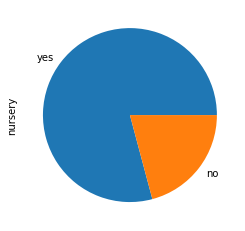

In [77]:
display(pd.DataFrame(data.nursery.value_counts()))
print(f'Количество NaN значений: {data.nursery.isnull().sum()}')
data.nursery.value_counts().plot(kind='pie');

In [78]:
print(f'Заполним {data.nursery.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'yes: {round(300/(395-16) * 16)}\nno: {round(79/(395-16) * 16)}')

Заполним 16 NaN значений в пропорциональном соотношении:
yes: 13
no: 3


In [79]:
data[data.nursery.isnull()].iloc[12]

school              MS
sex                  M
age                 19
address              U
famsize            GT3
Pstatus              T
Medu                 1
Fedu                 1
Mjob             other
Fjob          services
reason            home
guardian         other
traveltime           3
studytime            2
schoolsup           no
famsup              no
paid                no
activities          no
nursery            NaN
higher             yes
internet           yes
romantic            no
famrel               5
freetime             4
goout                4
health               2
absences             8
score              NaN
Name: 350, dtype: object

In [80]:
data.nursery[0:351].fillna('yes', inplace=True)
data.nursery[351:].fillna('no', inplace=True)
display(pd.DataFrame(data.nursery.value_counts()))

,nursery
yes,313
no,82


## Столбец 22 - higher: хочет ли получить высшее образование

,higher
yes,356
no,19


Количество NaN значений: 20


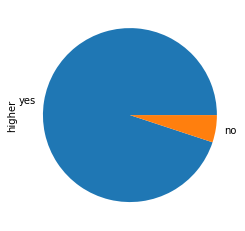

In [81]:
display(pd.DataFrame(data.higher.value_counts()))
print(f'Количество NaN значений: {data.higher.isnull().sum()}')
data.higher.value_counts().plot(kind='pie');

In [82]:
print(f'Заполним {data.higher.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'yes: {round(356/(395-20) * 20)}\nno: {round(19/(395-20) * 20)}')

Заполним 20 NaN значений в пропорциональном соотношении:
yes: 19
no: 1


In [83]:
data[data.higher.isnull()].iloc[18]

school                MS
sex                    M
age                   17
address                U
famsize              GT3
Pstatus                T
Medu                   2
Fedu                   3
Mjob               other
Fjob            services
reason        reputation
guardian          father
traveltime             2
studytime              2
schoolsup             no
famsup                no
paid                  no
activities           yes
nursery              yes
higher               NaN
internet             yes
romantic              no
famrel                 4
freetime               4
goout                  3
health                 3
absences               2
score                 50
Name: 382, dtype: object

In [84]:
data.higher[0:383].fillna('yes', inplace=True)
data.higher[383:].fillna('no', inplace=True)
display(pd.DataFrame(data.higher.value_counts()))

,higher
yes,375
no,20


## Столбец 23: internet: наличие интернета дома

,internet
yes,305
no,56


Количество NaN значений: 34


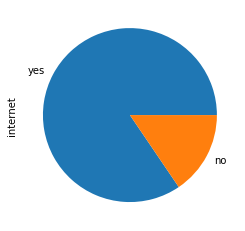

In [85]:
display(pd.DataFrame(data.internet.value_counts()))
print(f'Количество NaN значений: {data.internet.isnull().sum()}')
data.internet.value_counts().plot(kind='pie');

In [86]:
print(f'Заполним {data.internet.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'yes: {round(305/(395-34) * 34)}\nno: {round(56/(395-34) * 34)}')

Заполним 34 NaN значений в пропорциональном соотношении:
yes: 29
no: 5


In [87]:
data[data.internet.isnull()].iloc[28]

school                GP
sex                    M
age                   19
address                R
famsize              GT3
Pstatus                T
Medu                   3
Fedu                   3
Mjob               other
Fjob            services
reason        reputation
guardian          father
traveltime             1
studytime              2
schoolsup             no
famsup                no
paid                  no
activities           yes
nursery              yes
higher               yes
internet             NaN
romantic             NaN
famrel                 4
freetime               5
goout                  3
health                 5
absences               0
score                 60
Name: 308, dtype: object

In [88]:
data.internet[0:309].fillna('yes', inplace=True)
data.internet[309:].fillna('no', inplace=True)
display(pd.DataFrame(data.internet.value_counts()))

,internet
yes,334
no,61


## Столбец 24: romantic — в романтических отношениях (yes или no)

,romantic
no,240
yes,124


Количество NaN значений: 31
Заполним 31 NaN значений в пропорциональном соотношении:
no: 20
yes: 11


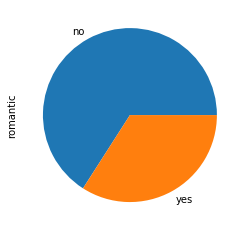

In [89]:
display(pd.DataFrame(data.romantic.value_counts()))
print(f'Количество NaN значений: {data.romantic.isnull().sum()}')
data.romantic.value_counts().plot(kind='pie');
print(f'Заполним {data.romantic.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'no: {round(240/(395-31) * 31)}\nyes: {round(124/(395-31) * 31)}')

In [90]:
data[data.romantic.isnull()].iloc[19]

school             GP
sex                 M
age                18
address             U
famsize           GT3
Pstatus             T
Medu                4
Fedu                3
Mjob          teacher
Fjob            other
reason         course
guardian       mother
traveltime          2
studytime           2
schoolsup          no
famsup            yes
paid              yes
activities         no
nursery            no
higher            yes
internet          yes
romantic          NaN
famrel              4
freetime            3
goout               2
health              3
absences            2
score              40
Name: 261, dtype: object

In [91]:
data.romantic[0:262].fillna('no', inplace=True)
data.romantic[262:].fillna('yes', inplace=True)
display(pd.DataFrame(data.romantic.value_counts()))

,romantic
no,260
yes,135


## Столбец 25 - famrel: семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Количество NaN значений: 27


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Границы выбросов: 2.5, 6.5, Медиана: 4.0


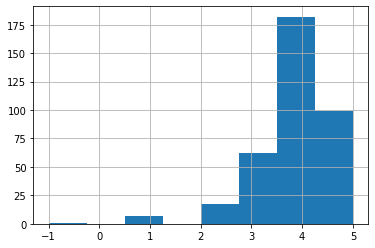

In [92]:
display(pd.DataFrame(data.famrel.value_counts()))
print(f'Количество NaN значений: {data.famrel.isnull().sum()}')
display(data.famrel.describe())
perc25 = data.famrel.quantile(0.25)
perc75 = data.famrel.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.famrel.median()}')
data.famrel.hist(bins=8);

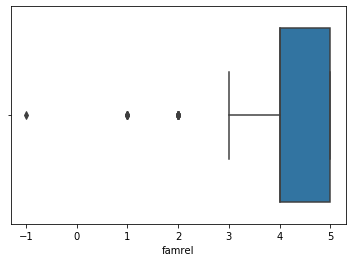

In [93]:
sns.boxplot(data.famrel);

## Есть выбросы: все значения менее показателя 3.0. В целом у школьников хорошие или нормальные отношения в семье

In [94]:
data.famrel = data.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

## Замена всего лишь одного неправильно введенного показателя - 1.0 на 1.0 - сильно изменила границы выбросов. Однако студенты, давшие оценку семейным отношениям 1.0, все равно находятся за пределами IQR. Я поступлю, как и в предыдущих случаях: присвою им ближайшие значения:

In [95]:
data.famrel = data.famrel.apply(lambda x: 2.0 if x == 1.0 else x)

In [96]:
print(f'Заполним {data.famrel.isnull().sum()} NaN значений в пропорциональном соотношении:')
print(f'4.0: {round(182/(395-27) * 27)}\n5.0: {round(99/(395-27) * 27)}\n3.0: {round(62/(395-27) * 27)}')

Заполним 27 NaN значений в пропорциональном соотношении:
4.0: 13
5.0: 7
3.0: 5


In [97]:
data[data.famrel.isnull()].iloc[24]

school              MS
sex                  F
age                 18
address              U
famsize            GT3
Pstatus              T
Medu                 3
Fedu                 3
Mjob          services
Fjob          services
reason          course
guardian        father
traveltime           1
studytime            2
schoolsup           no
famsup             yes
paid                no
activities          no
nursery            yes
higher             yes
internet            no
romantic           yes
famrel             NaN
freetime             3
goout                4
health               5
absences             0
score               45
Name: 355, dtype: object

In [98]:
data.famrel[0:196].fillna(4.0, inplace=True)
data.famrel[217:230].fillna(5.0, inplace=True)
data.famrel[230:].fillna(3.0, inplace=True)

## Столбец 26: freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)



,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Количество NaN значений: 11


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Границы выбросов: 1.5, 5.5, Медиана: 3.0


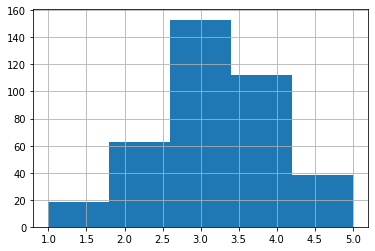

In [99]:
display(pd.DataFrame(data.freetime.value_counts()))
print(f'Количество NaN значений: {data.freetime.isnull().sum()}')
display(data.freetime.describe())
perc25 = data.freetime.quantile(0.25)
perc75 = data.freetime.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.freetime.median()}')
data.freetime.hist(bins=5);

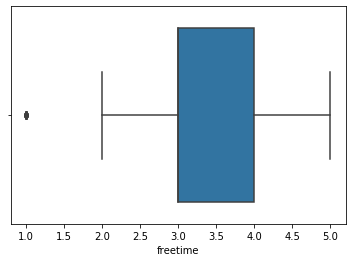

In [100]:
sns.boxplot(data.freetime);

## Есть выбросы: 18 человек, указавших, что у них совсем нет свободного времени после школы

In [101]:
data.freetime = data.freetime.apply(lambda x: 2.0 if x == 1.0 else x)

In [102]:
# поскольку NaN значений очень мало, я их заменю медианным показателем:
data.freetime.fillna(3.0, inplace=True)

## Столбец 27 - goout: проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Количество NaN значений: 8


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Границы выбросов: -1.0, 7.0, Медиана: 3.0


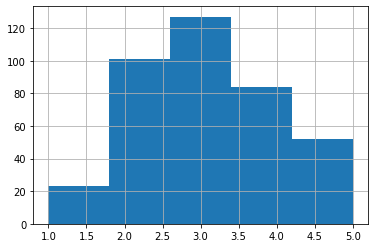

In [103]:
display(pd.DataFrame(data.goout.value_counts()))
print(f'Количество NaN значений: {data.goout.isnull().sum()}')
display(data.goout.describe())
perc25 = data.goout.quantile(0.25)
perc75 = data.goout.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.goout.median()}')
data.goout.hist(bins=5);

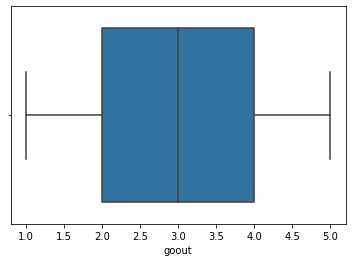

In [104]:
sns.boxplot(data.goout);

## Выбросов нет.

In [105]:
# поскольку NaN значений очень мало, я их заменю медианным показателем:
data.goout.fillna(3.0, inplace=True)

## Столбец 28 - health: текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Количество NaN значений: 15


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Границы выбросов: 0.0, 8.0, Медиана: 4.0


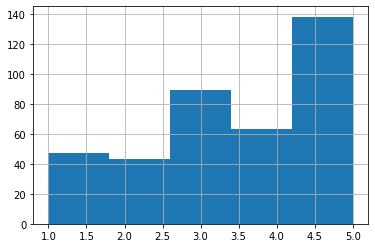

In [106]:
display(pd.DataFrame(data.health.value_counts()))
print(f'Количество NaN значений: {data.health.isnull().sum()}')
display(data.health.describe())
perc25 = data.health.quantile(0.25)
perc75 = data.health.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.health.median()}')
data.health.hist(bins=5);

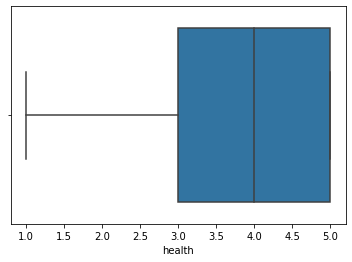

In [107]:
sns.boxplot(data.health);

## Выбросов нет

In [108]:
# поскольку NaN значений очень мало, я их заменю медианным показателем:
data.health.fillna(4.0, inplace=True)

## Столбец 29 - absences: количество пропущенных занятий

,index,absences
0,0.0,111
16,1.0,3
1,2.0,60
8,3.0,8
2,4.0,53
11,5.0,5
3,6.0,31
10,7.0,6


Количество NaN значений: 12


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

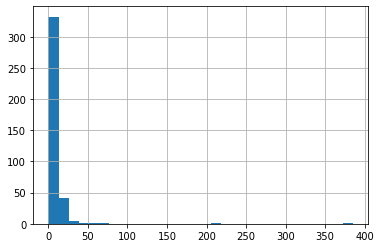

In [109]:
display(data.absences.value_counts().reset_index().sort_values('index').head(8))
print(f'Количество NaN значений: {data.absences.isnull().sum()}')
display(data.absences.describe())
data.absences.hist(bins=30);

Границы выбросов: -12.0, 20.0, Медиана: 4.0


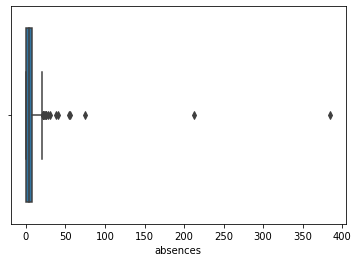

In [110]:
sns.boxplot(data.absences);
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75) 
iqr = 1.5*(perc75-perc25)
print(f'Границы выбросов: {perc25-iqr}, {perc75 + iqr}, Медиана: {data.absences.median()}')

## Есть выбросы:  17 студентов, у которых более 20 пропусков.

In [111]:
data.loc[data.absences > 20.00]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,...,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,...,yes,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,...,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,T,3.0,3.0,other,other,...,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,T,4.0,4.0,services,teacher,...,yes,yes,yes,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,...,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,services,...,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,...,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,T,4.0,3.0,at_home,other,...,yes,yes,yes,yes,3.0,2.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,...,no,no,yes,yes,3.0,2.0,1.0,5.0,75.0,45.0


In [112]:
# заполним выбросы:
data.absences = data.absences.apply(lambda x: 20.0 if x > 20.0 else x)

In [113]:
# заполним пропуски медианным значением:
data.absences.fillna(4.0, inplace=True)

## Столбец 30 - score: баллы по госэкзамену по математике

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Количество NaN значений: 6


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

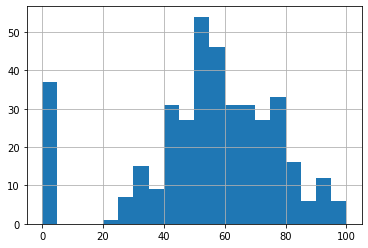

In [114]:
display(pd.DataFrame(data.score.value_counts()))
print(f'Количество NaN значений: {data.score.isnull().sum()}')
display(data.score.describe())
data.score.hist(bins=20);

Медиана равна: 55.0


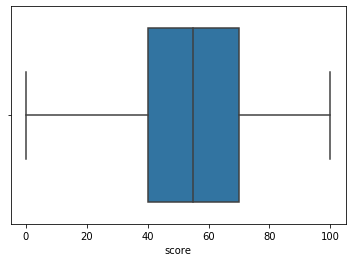

In [115]:
sns.boxplot(data.score)
print(f'Медиана равна: {data.score.median()}')

## Нормальное распределение, показатели медианы и среднего почти совпадают, выбросов нет.

In [116]:
# заполним пропуски медианным значением:
data.score.fillna(55.0, inplace=True)

In [117]:
data.info() # проверяем: теперь все колонки заполнены.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  schoolsup   395 non-null    object 
 15  famsup      395 non-null    object 
 16  paid        395 non-null    object 
 17  activities  395 non-null    object 
 18  nursery     395 non-null    object 
 19  higher      395 non-null    o

## Корреляционный анализ переменных:

In [118]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.163052,-0.159083,0.134609,0.015220,0.033556,0.028592,0.131644,-0.060653,0.183400,-0.151211
Medu,-0.163052,1.000000,0.597383,-0.154044,0.086106,-0.010316,0.022137,0.063361,-0.050991,0.098754,0.205568
Fedu,-0.159083,0.597383,1.000000,-0.114324,0.044339,-0.019392,-0.036479,0.036803,0.000743,0.021878,0.126445
traveltime,0.134609,-0.154044,-0.114324,1.000000,-0.097096,-0.025926,-0.038908,0.017678,-0.039849,-0.032206,-0.086341
studytime,0.015220,0.086106,0.044339,-0.097096,1.000000,0.062126,-0.108135,-0.051636,-0.064401,-0.082365,0.118999
famrel,0.033556,-0.010316,-0.019392,-0.025926,0.062126,1.000000,0.123201,0.056208,0.059117,-0.085946,0.061318
freetime,0.028592,0.022137,-0.036479,-0.038908,-0.108135,0.123201,1.000000,0.284509,0.060347,0.013117,0.011026
goout,0.131644,0.063361,0.036803,0.017678,-0.051636,0.056208,0.284509,1.000000,-0.014274,0.081543,-0.125708
health,-0.060653,-0.050991,0.000743,-0.039849,-0.064401,0.059117,0.060347,-0.014274,1.000000,-0.044288,-0.072776
absences,0.183400,0.098754,0.021878,-0.032206,-0.082365,-0.085946,0.013117,0.081543,-0.044288,1.000000,0.067536


## Среди численных параметров нет значимых корреляций. 

## Проведем анализ категориальных переменных:

In [119]:
data_object = data.select_dtypes(include=[object])

In [120]:
list_object = data_object.columns.tolist()
list_object

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [121]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

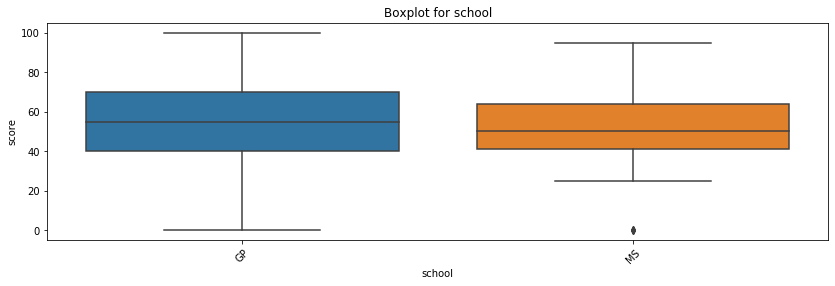

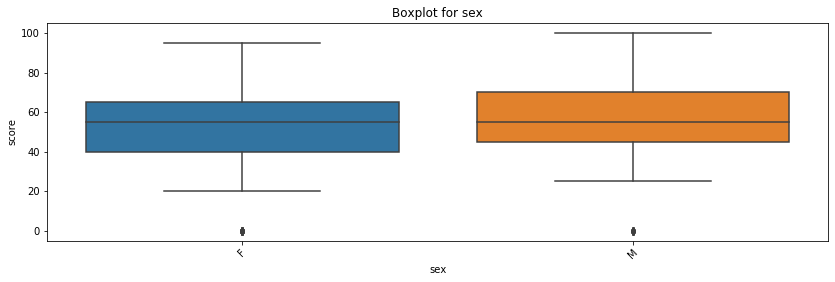

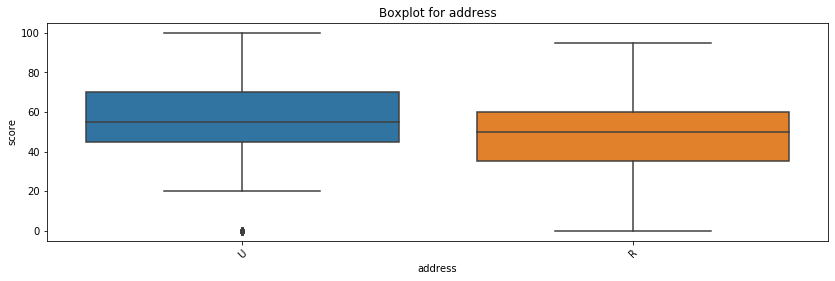

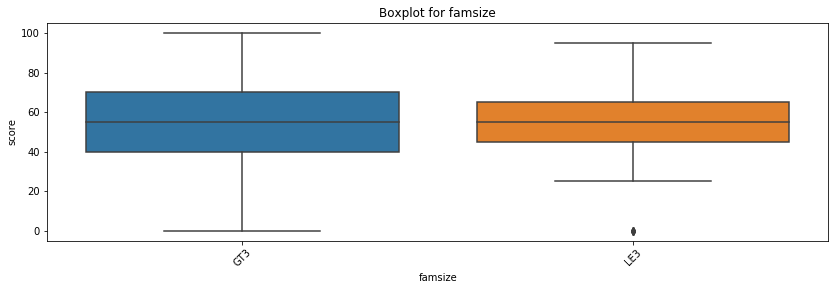

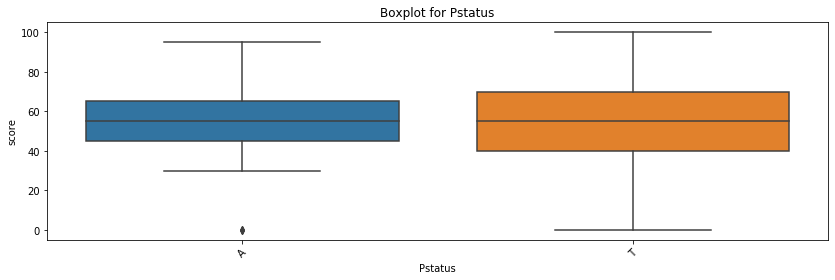

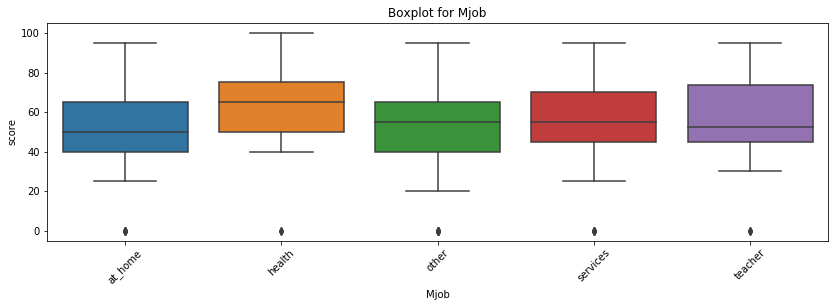

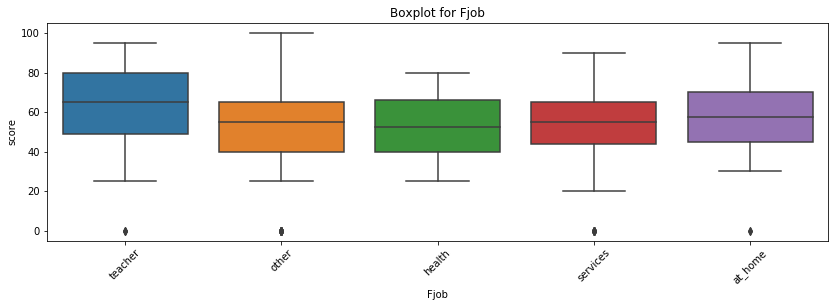

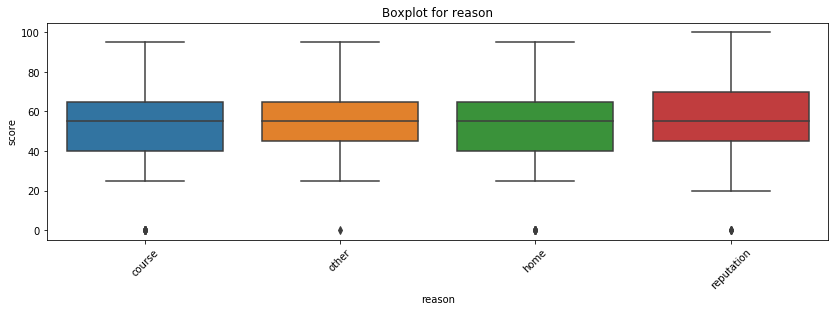

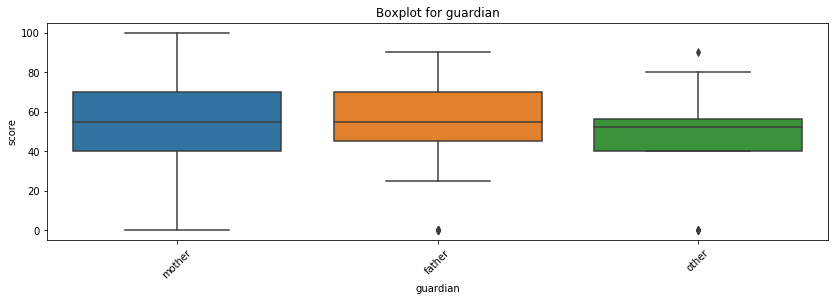

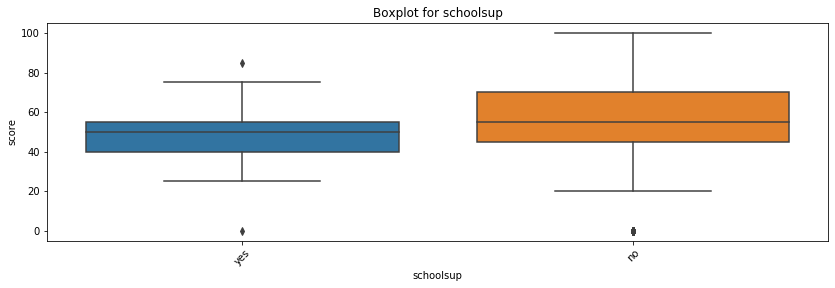

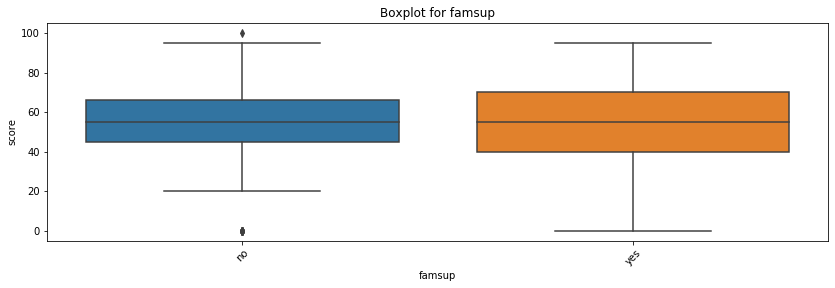

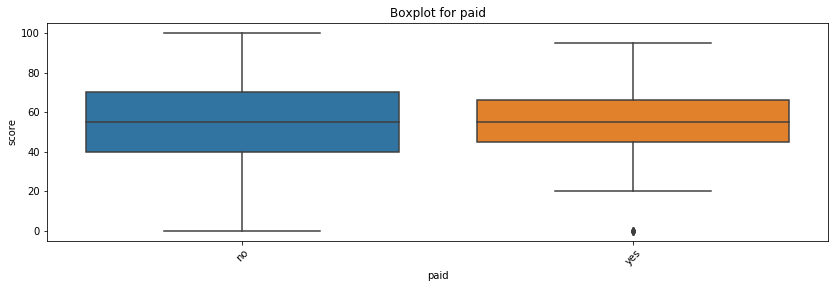

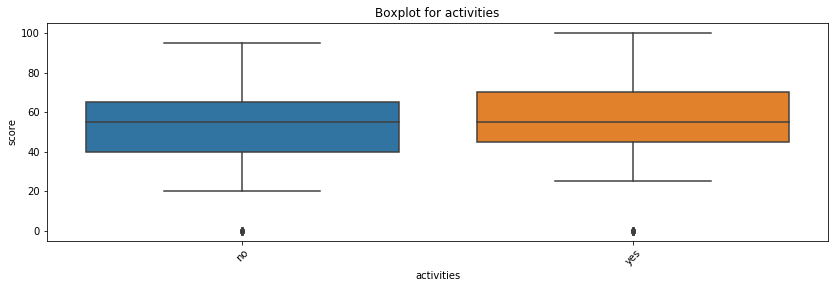

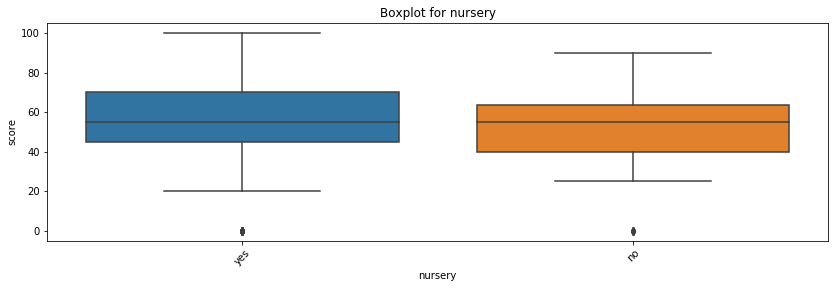

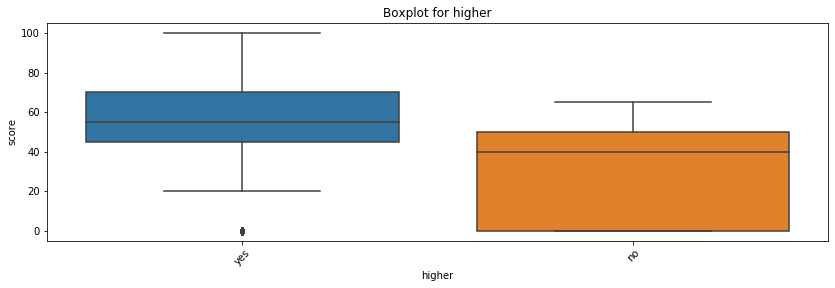

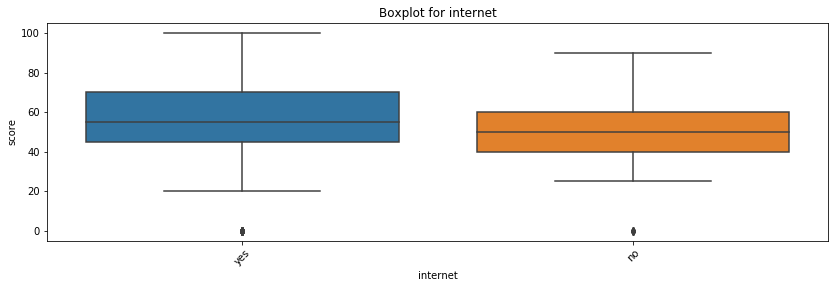

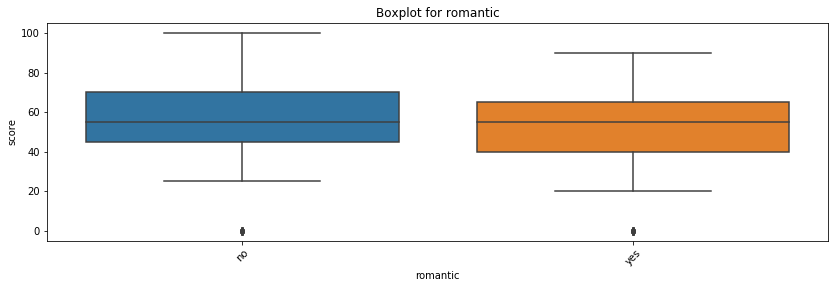

In [122]:
for col in list_object:
    get_boxplot(col)

In [123]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break 

In [124]:
for col in list_object:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки internet
Найдены статистически значимые различия для колонки romantic


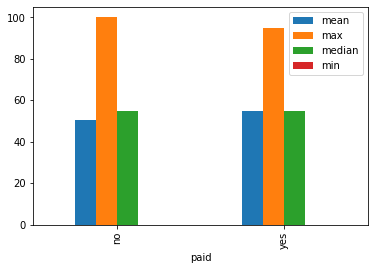

In [125]:
data.groupby('paid')['score'].agg(['mean', 'max', 'median', 'min']).plot(kind = 'bar');

## Заключение:

Чистота данных:
1. в данных было достаточно мало пустых значений (не более 10%). Все пустые значения в зависимости от переменной я заполняла либо медианным значением, либо пропорционально представленным значениям.
2. Выборка небольшая (всего 395 наблюдений) и неравномерно распределена между двумя школами: на школу GP приходится почти 90% всех наблюдений.
3. Выбросы в выборке я заполняла ближайшими к выбросам значениями. Возможно, лучшим вариантом было бы - удалить строки с выбросами, но учитывая миниатюрность выборки, это сильно исказит результаты.

3. Две колонки в датасете оказались непрезентативны:
- колонка studytime, granular - стопроцентная отрицательная корреляция с параметром studytime;
- колонка failure: Все значения выше 0.0. попали в выбросы. Значит, подавляющее большинство учеников либо не поняли вопрос, либо не считают, что сталкиваются с неудачами в жизни. Поскольку нет распределения, этот показатель нерелевантен и бесполезен для анализа.

Эти колонки я удалила из датасета.

4. Корреляционный анализ числовых параметров не выявил значимых корреляций: ни один из числовых параметров никак не связан с высоким/низким баллом на гос.экзамене по математике.

5. Учитывая небольшой размер выборки, в анализе категориальных переменных я использовала pvalue = 0.1

6. Анализ категориальных переменных выявил семь параметров со статистически значимыми различиями:
- address - место проживания студентов: студенты, проживающие по адресу U, получали более высокий балл по гос.экзамену по математике
- higher: студенты, которые собираются получать высшее образование, также получали более высокий балл
- romantic: студенты, не состоящие в романтических отношениях, также демонстрировали большую успешность в экзамене по математике
- schoolsup - студенты, получавшие поддержку в школе, хуже справлялись на гос.экзамене. Видимо, этот параметр выделяет группу слабых студентов, которым нужна дополнительная помощь в математике.
- internet - ученики с интернетом дома справлялись на экзамене лучше. Возможно, этот критерий выделяет более обеспеченную группу учеников, а дети из более обеспеченных семей исторически лучше успевают на экзаменах.
- sex - мальчики с большей вероятностью получают более высокий балл на экзамене по математике. Это объяснимо: математика относится к группе точных наук, и исторически мальчики демонстрируют в точных науках большую успешность, чем девочки.
- paid - дополнительные платные занятия по математике: в среднем (mean) студенты, получавшие дополнительные платные уроки, набрали более высокий балл. 

7. Эти семь параметров можно использовать для построения предсказательной модели.